# Predicting Heart Disease in Patients using Neural Networks

## Introduction

## About the Dataset
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by Machine Learning researchers to this date. The "target" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## Content

### Attribute Information

| Variable  | Definition    | Key   |
|---------- |------------   |-----  |
| age       | age in years  |       |
| sex       | sex           | 1 = male, 0 = female |
| cp        | type of chest pain experienced | 1 = typical angina, 2 = atypical angina, 3 = non,anguinal pain, 4 = asymptomatic |
| trestbps  | resting blood pressure in mm Hg on admission to the hospital | |
| chol      | serum cholesterol in mg/dl | |
| fbs       | fasting blood sugar & gt; > 120 mg/dl) | 1 = true, 0 = false) |
| restecg   | resting electrocardiographic results| 0 = normal, 1 = having ST-T wave abormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria |
| thalach   | maximum heart rate achieved |  |
| exang     | exercise induced angina   | 1 = yes, 0 = no |
| oldpeak   | ST depression induced by exercise relative to rest |  |
| slope     | the slope of the peak exercise ST segment | 1 = upsloping, 2 = flat, 3 = downsloping   |
| ca        | number of major vessels (0-3) coloured by flouroscopy | |
| thal      | has a blood disorder called thalassemia| 3 = normal, 6 = fixed defect, 7 = reversible defect |
| target    | has heart disease | 1 = yes, 0 = no |



## 1. Import Libraries & Load Dataset

In [799]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

%matplotlib inline



In [800]:
# read  in dataset
heart = pd.read_csv('heart.csv')

#display first 5 rows
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [801]:
# verify no. of rows and columns
heart.shape

(303, 14)

## 2. Preparing the data

### 2.1 Rename columns for clarity

In [802]:
#create dictionary of current and new column names
col_names = {'cp': 'chest_pain', 
            'trestbps': 'rest_bps', 
            'thalach': 'max_heartrate', 
            'ca' : 'major_vessels'}

#replace haeadings in our dataframe
heart = heart.rename(col_names, axis=1)

#check headings have been renamed correctly
heart.head()



,age,sex,chest_pain,rest_bps,chol,fbs,restecg,max_heartrate,exang,oldpeak,slope,major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [803]:
# check for null values and data types
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   chest_pain     303 non-null    int64  
 3   rest_bps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   max_heartrate  303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  major_vessels  303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [804]:
heart.isnull().sum()

age              0
sex              0
chest_pain       0
rest_bps         0
chol             0
fbs              0
restecg          0
max_heartrate    0
exang            0
oldpeak          0
slope            0
major_vessels    0
thal             0
target           0
dtype: int64

There are no missing values to consider.

In [805]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## 3. Exploratory Analysis

In [806]:
heart.describe()

,age,sex,chest_pain,rest_bps,chol,fbs,restecg,max_heartrate,exang,oldpeak,slope,major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Check relationship between the variables

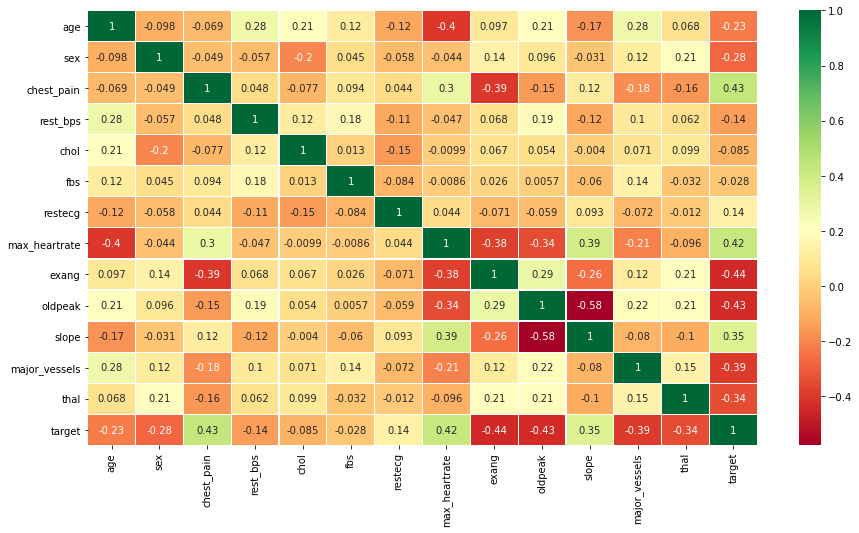

In [807]:
sns.heatmap(heart.corr(), annot=True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

__Relationship between the different columns__

We observe weak positive correlation between:
*  the `max_heartrate` and the `slope` of the peak exercise ST segment with a correlation coeffecient of 0.39. The higher the maximum heartrate, the higher the value for the slope i.e. there is more downsloping. **????**
There is also some weak __negative__ correlation between:
* the `age` and `max_heartrate` features,as expected - the younger you are, the faster your heart is capable of beating *???**
* the `chest_pain` and `exang` variables
* `oldpeak` (ST depression induced by exercise relative to rest) and `slope` (the slope of the peak exercise ST segment

### Check relationship with target variable

<AxesSubplot:>

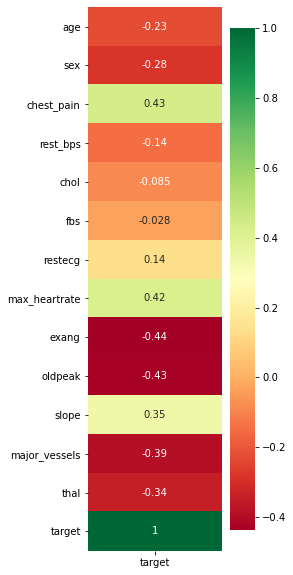

In [808]:
target_corr = heart.corr().loc[:,['target']]
plt.figure(figsize=(3,10))
sns.heatmap(target_corr, annot = True, cmap = 'RdYlGn')

__Relationship with the Target Variable__

We observe weak **positive** correlation between the `target` variable i.e. whether or not a patient has heart disease and :

* the `chest pain type` with a correlation coeffecient of 0.43.
* closely followed by the `maximum heartrate` with correlation coefficient of 0.42

We also note a weak **negative** correlation between the `target` variable and:
* the `exang` variable i.e. there is some correlation between a person having heart disease and exercise induced angina, as you would expect
* the `oldpeak` which is ST depression induced by exercise relative to rest
* the `major_vessels` column which corresponds to the number of major vessels the patient has

### Exploring Age & Heart Disease

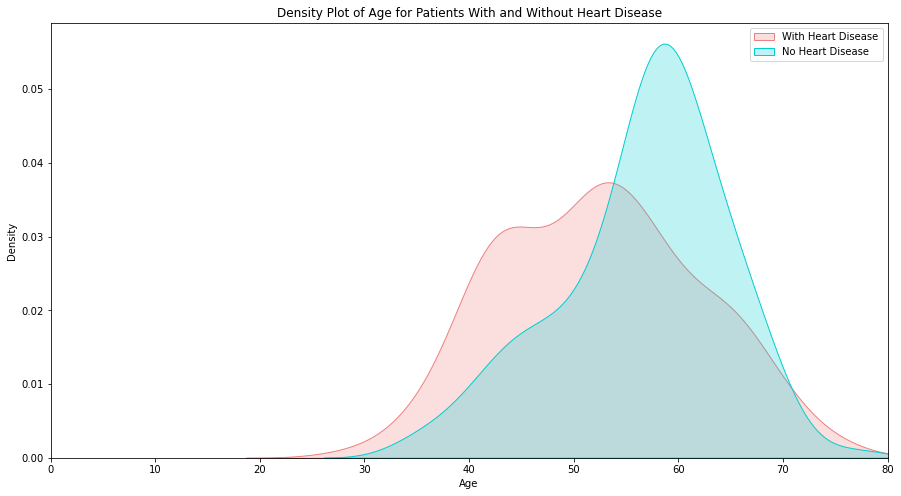

In [809]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(heart['age'][heart.target == 1], color='lightcoral', shade = True)
sns.kdeplot(heart['age'][heart.target == 0], color='darkturquoise', shade = True)
plt.legend(['With Heart Disease', 'No Heart Disease'])
plt.title('Density Plot of Age for Patients With and Without Heart Disease')
ax.set(xlabel = 'Age')
plt.xlim(0, 80)
plt.show()

### Exploring Heart Disease Amongst Men & Women

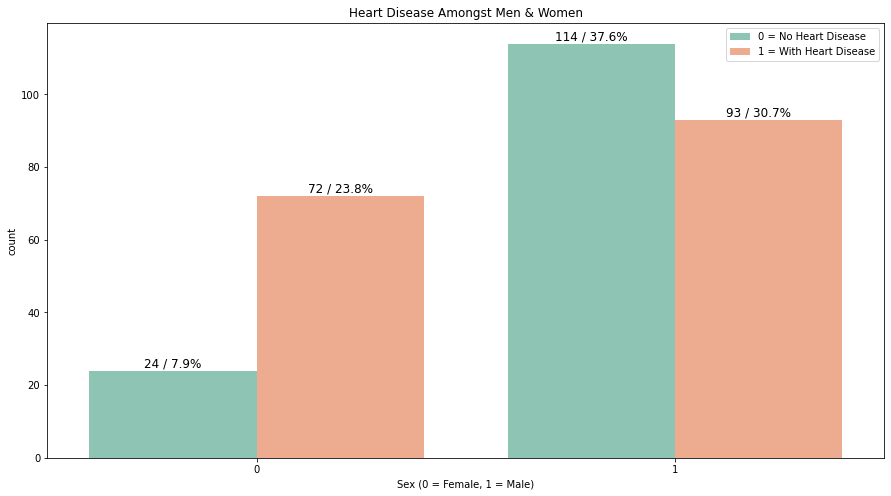

In [810]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=heart, x='sex', hue='target', palette='Set2', alpha=0.8)
ax.legend(['0 = No Heart Disease', '1 = With Heart Disease'])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.title('Heart Disease Amongst Men & Women')


total_cnt = heart['target'].count()

for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width/ 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)

### Exploring Chest Pain Type

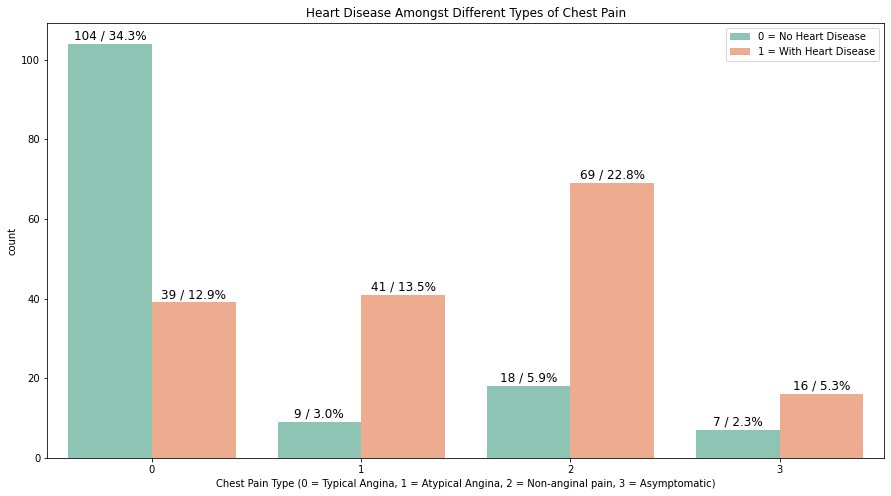

In [811]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=heart, x='chest_pain', hue='target', palette='Set2', alpha=0.8)
ax.legend(['0 = No Heart Disease', '1 = With Heart Disease'])
plt.xlabel('Chest Pain Type (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal pain, 3 = Asymptomatic)')
plt.title('Heart Disease Amongst Different Types of Chest Pain')


total_cnt = heart['target'].count()

for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width/ 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)

__Observations - Chest Pain Type__
* __0 = Typical angina__ i.e. chest pain is related to decreased blood supply to the heart. This was the most common type of chest pain experienced by patients in the study. However, **only approx. 27% of the patients with typical angina chest pain had heart disease**. The majority of cases do not point to heart disease. <br>
<br>
* __1 = Atypical angina__ i.e. chest pain is not related to the heart. **Approx. 82% of cases of Atypical Angina was related to heart disease.** <br>
<br>
* __2 = Non-anginal pain__ i.e. typically oesophageall spasms (non-heart related). **Approx. 79% of patients with Non-anginal pain had heart disease.** <br>
<br>
* __3 = Asymptomatic__ i.e. chest pain not showing signs of disease. **A**pprox. 70% of patients with Asymptomatic chest pain had heart disease.**


### Maximum Heartrate

Text(0.5, 1.0, 'Patients Without Heart Disease')

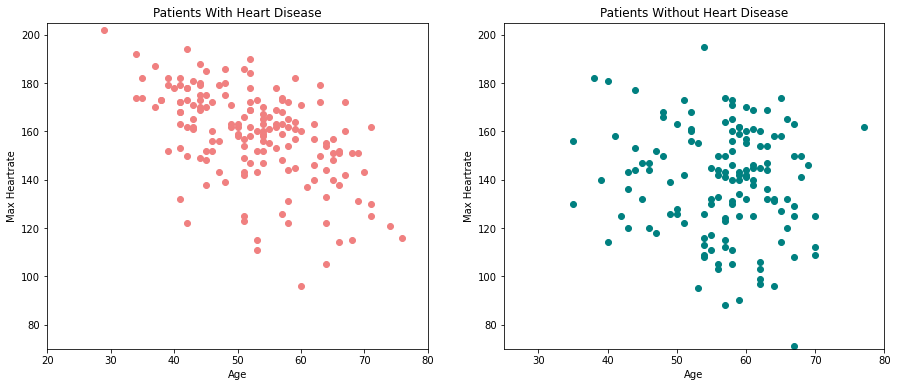

In [812]:
fig,axes = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax1 = axes[0]
ax2 = axes[1]

ax1.scatter(heart.age[heart.target==1], heart.max_heartrate[heart.target==1], c='lightcoral')
ax1.set_xlim(20,80)
ax1.set_ylim(70,205)
ax1.set_xlabel('Age')
ax1.set_ylabel('Max Heartrate')
ax1.set_title('Patients With Heart Disease')

ax2.scatter(heart.age[heart.target==0], heart.max_heartrate[heart.target==0], c='teal')
ax2.set_xlim(25,80)
ax2.set_ylim(70,205)
ax2.set_xlabel('Age')
ax2.set_ylabel('Max Heartrate')
ax2.set_title('Patients Without Heart Disease')



### Old Peak

Text(0.5, 1.0, 'Patients Without Heart Disease')

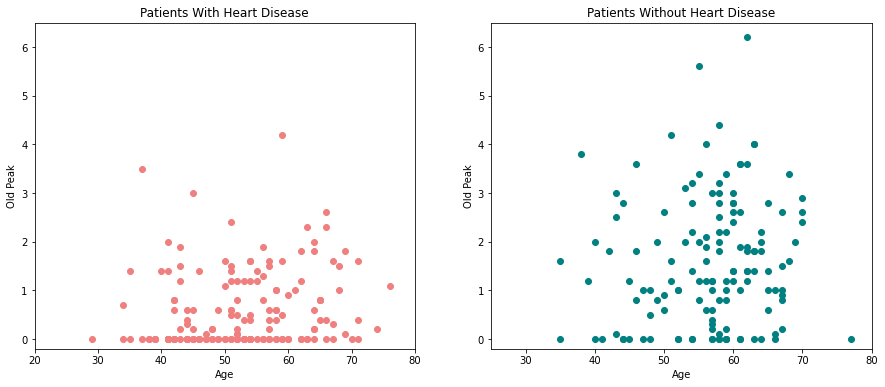

In [813]:
fig,axes = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax1 = axes[0]
ax2 = axes[1]

ax1.scatter(heart.age[heart.target==1], heart.oldpeak[heart.target==1], c='lightcoral')
ax1.set_xlim(20,80)
ax1.set_ylim(-0.2,6.5)
ax1.set_xlabel('Age')
ax1.set_ylabel('Old Peak')
ax1.set_title('Patients With Heart Disease')

ax2.scatter(heart.age[heart.target==0], heart.oldpeak[heart.target==0], c='teal')
ax2.set_xlim(25,80)
ax2.set_ylim(-0.2,6.5)
ax2.set_xlabel('Age')
ax2.set_ylabel('Old Peak')
ax2.set_title('Patients Without Heart Disease')

### Resting Blood Sugar

Text(0.5, 1.0, 'Patients Without Heart Disease')

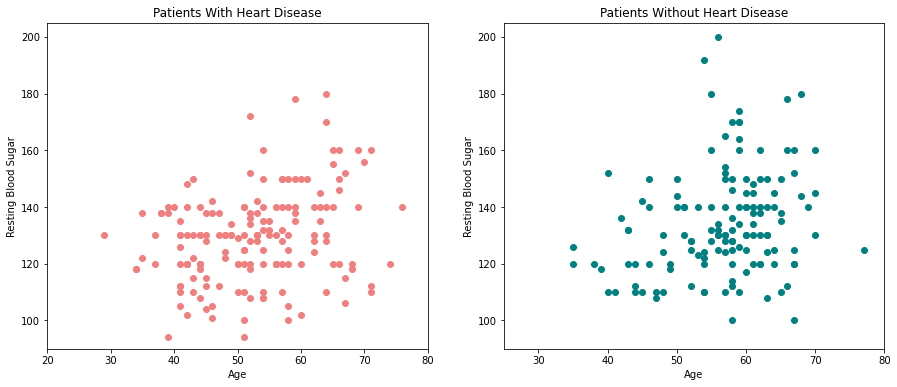

In [814]:
fig,axes = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax1 = axes[0]
ax2 = axes[1]

ax1.scatter(heart.age[heart.target==1], heart.rest_bps[heart.target==1], c='lightcoral')
ax1.set_xlim(20,80)
ax1.set_ylim(90,205)
ax1.set_xlabel('Age')
ax1.set_ylabel('Resting Blood Sugar')
ax1.set_title('Patients With Heart Disease')

ax2.scatter(heart.age[heart.target==0], heart.rest_bps[heart.target==0], c='teal')
ax2.set_xlim(25,80)
ax2.set_ylim(90,205)
ax2.set_xlabel('Age')
ax2.set_ylabel('Resting Blood Sugar')
ax2.set_title('Patients Without Heart Disease')

### Cholesterol

Text(0.5, 1.0, 'Patients Without Heart Disease')

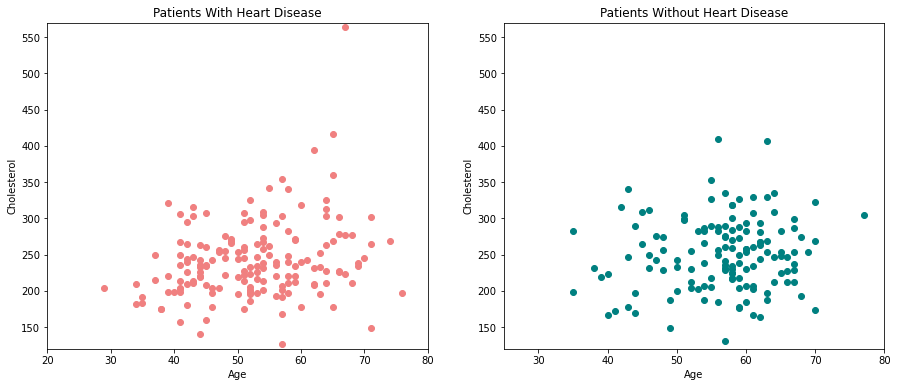

In [815]:
fig,axes = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax1 = axes[0]
ax2 = axes[1]

ax1.scatter(heart.age[heart.target==1], heart.chol[heart.target==1], c='lightcoral')
ax1.set_xlim(20,80)
ax1.set_ylim(120,570)
ax1.set_xlabel('Age')
ax1.set_ylabel('Cholesterol')
ax1.set_title('Patients With Heart Disease')

ax2.scatter(heart.age[heart.target==0], heart.chol[heart.target==0], c='teal')
ax2.set_xlim(25,80)
ax2.set_ylim(120,570)
ax2.set_xlabel('Age')
ax2.set_ylabel('Cholesterol')
ax2.set_title('Patients Without Heart Disease')

#### Ignore Outlier with 564 Cholesterol - consider replacing this with mean??

Text(0.5, 1.0, 'Patients Without Heart Disease')

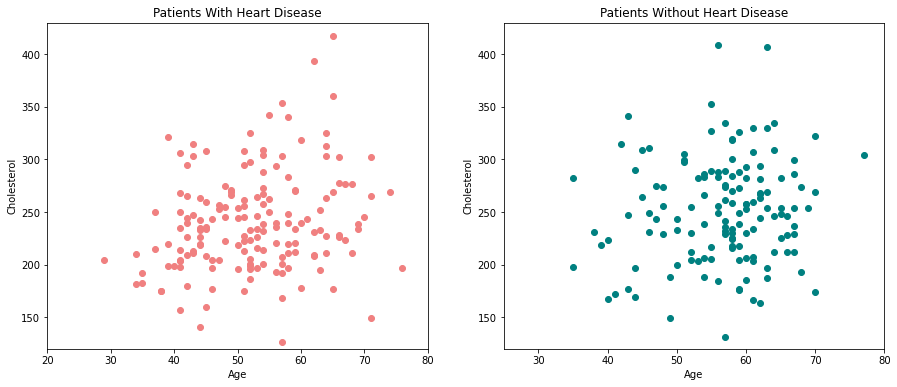

In [816]:
fig,axes = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax1 = axes[0]
ax2 = axes[1]

ax1.scatter(heart.age[heart.target==1], heart.chol[heart.target==1], c='lightcoral')
ax1.set_xlim(20,80)
ax1.set_ylim(120,430)
ax1.set_xlabel('Age')
ax1.set_ylabel('Cholesterol')
ax1.set_title('Patients With Heart Disease')

ax2.scatter(heart.age[heart.target==0], heart.chol[heart.target==0], c='teal')
ax2.set_xlim(25,80)
ax2.set_ylim(120,430)
ax2.set_xlabel('Age')
ax2.set_ylabel('Cholesterol')
ax2.set_title('Patients Without Heart Disease')

### Slope

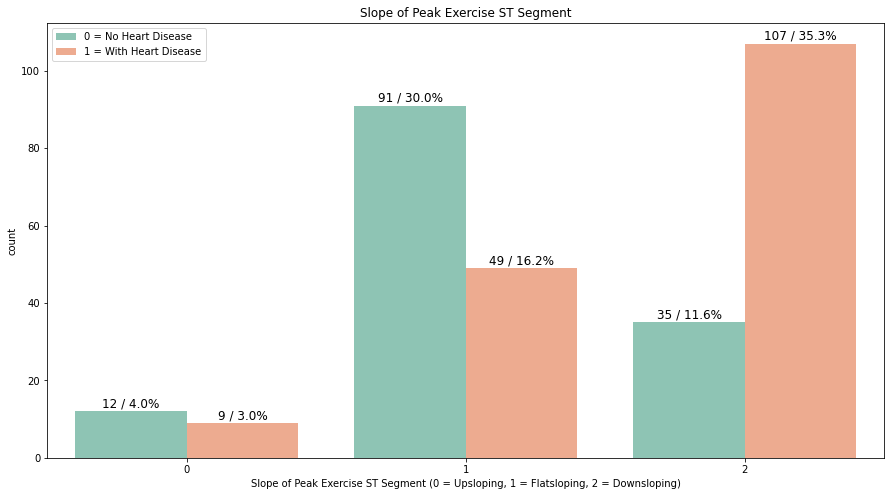

In [817]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=heart, x='slope', hue='target', palette='Set2', alpha=0.8)
ax.legend(['0 = No Heart Disease', '1 = With Heart Disease'])
plt.xlabel('Slope of Peak Exercise ST Segment (0 = Upsloping, 1 = Flatsloping, 2 = Downsloping)')
plt.title('Slope of Peak Exercise ST Segment')


total_cnt = heart['target'].count()

for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width/ 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)

### Number of Major Vessels



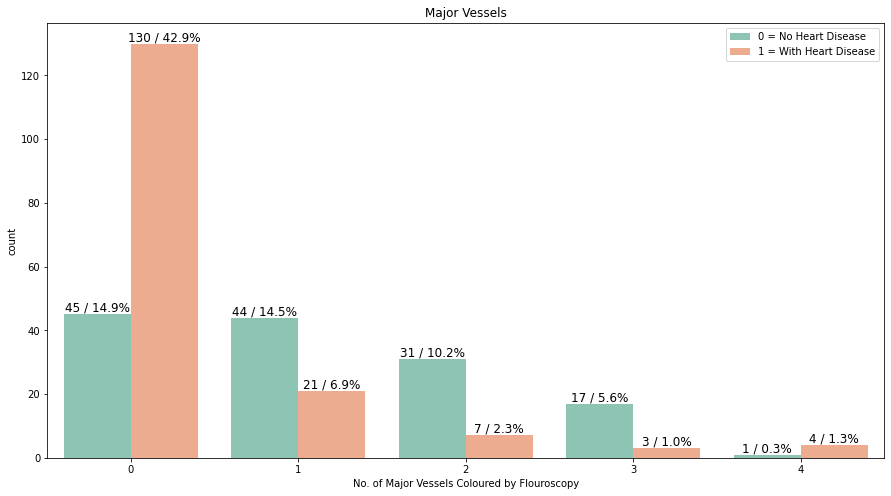

In [818]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=heart, x='major_vessels', hue='target', palette='Set2', alpha=0.8)
ax.legend(['0 = No Heart Disease', '1 = With Heart Disease'])
plt.xlabel('No. of Major Vessels Coloured by Flouroscopy')
plt.title('Major Vessels')


total_cnt = heart['target'].count()

for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width/ 2, height + 2, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)

## Neural Network

### 1. Creating Dummy Variables 

Create dummy variables for categorical data:

* `sex`
* `chest_pain`
* `fbs` 
* `restecg`
* `exang`
* `major_vessels`
* `slope` 
* `thal`
* `target`


In [819]:
le = LabelEncoder()

heart['sex'] = le.fit_transform(heart.sex)
heart['chest_pain'] = le.fit_transform(heart.chest_pain)
heart['restecg'] = le.fit_transform(heart.restecg)
heart['exang'] = le.fit_transform(heart.exang)
heart['major_vessels'] = le.fit_transform(heart.major_vessels)
heart['slope'] = le.fit_transform(heart.slope)
heart['thal'] = le.fit_transform(heart.thal)
heart['target'] = le.fit_transform(heart.target)

heart.head(5)

,age,sex,chest_pain,rest_bps,chol,fbs,restecg,max_heartrate,exang,oldpeak,slope,major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [820]:
X = heart.drop(['target'], axis = 1)
y = heart['target']
labels = np.unique(y)

### 2. Split the Training Data & Test Data

In [821]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [822]:
#clf = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
clf = MLPClassifier(hidden_layer_sizes=(500,200,100), max_iter=200,activation = 'tanh', learning_rate = 'adaptive', learning_rate_init = 0.0001, solver='adam',random_state=1)

In [823]:
clf.fit(X_train, y_train)

/Users/lararenae/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(500, 200, 100),
              learning_rate='adaptive', learning_rate_init=0.0001,
              random_state=1)

In [824]:
y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.5)

Set the probability threshold at 0.5 as we care more about false negatives than false positives

In [825]:
y_pred_train = clf.predict(X_train)
y_pred_train = (y_pred_train > 0.5)
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
accuracy_score(y_train, y_pred_train)

[[ 88  20]
 [ 15 119]]


0.8553719008264463

In [826]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19 11]
 [ 4 27]]


0.7540983606557377

In [827]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.71      0.87      0.78        31

    accuracy                           0.75        61
   macro avg       0.77      0.75      0.75        61
weighted avg       0.77      0.75      0.75        61



<Figure size 432x288 with 0 Axes>

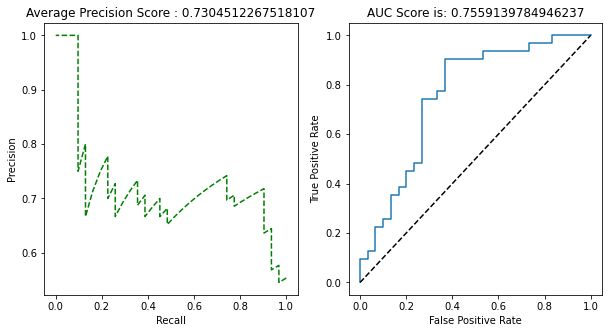

<Figure size 432x288 with 0 Axes>

In [828]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
plotting(y_test,clf.predict_proba(X_test))
plt.figure()   